In [1]:
import os
import sys
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Ajout du chemin vers les scripts du cours (libsigma)
# On utilise ".." car tu as indiqué que cela fonctionnait pour toi précédemment
sys.path.append("..")
sys.path.append("libsigma")

# Import des fonctions fournies dans le cours
from libsigma import read_and_write as rw
from libsigma import classification as cla

 Histogramme des polygones retrouvé 


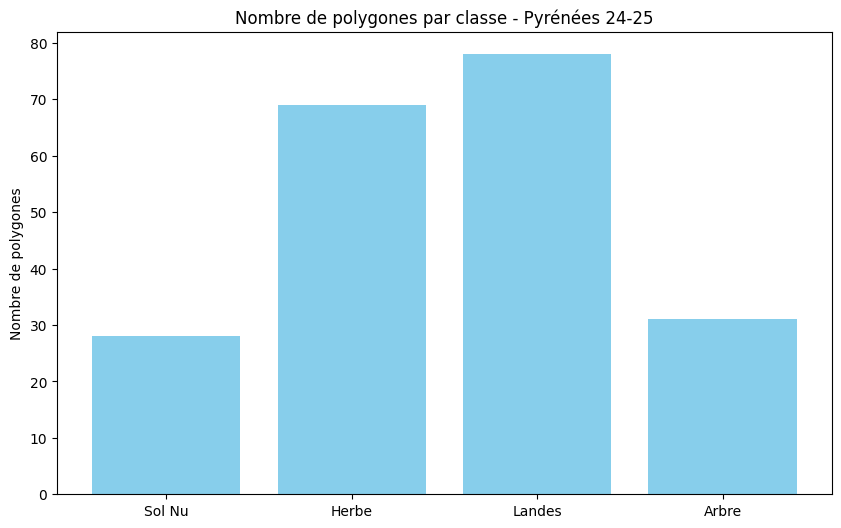

In [2]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Chemin du fichier (basé sur tes derniers messages)
sample_filename = '/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp'

# 2. Lecture du fichier
gdf = gpd.read_file(sample_filename)

# 3. Comptage des polygones par classe
poly_counts = gdf['strate'].value_counts().sort_index()

# Noms des classes
class_names = {1: "Sol Nu", 2: "Herbe", 3: "Landes", 4: "Arbre"}
labels = [class_names[i] for i in poly_counts.index]

# 4. Affichage
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, poly_counts.values, color='skyblue')

ax.set_title("Nombre de polygones par classe - Pyrénées 24-25")
ax.set_ylabel("Nombre de polygones")

# 5. Sauvegarde
os.makedirs('results/figure', exist_ok=True)
plt.savefig('results/figure/diag_baton_nb_poly_by_class.png')

print(" Histogramme des polygones retrouvé ")
plt.show()

Contenu du dossier /home/onyxia/work/data/projet_eval/ :

--- Vérification de la trinité Shapefile ---
✅ .shp est présent.
✅ .shx est présent.
✅ .dbf est présent.


In [17]:
import geopandas as gpd
import pandas as pd
import os

# 1. Chargement du fichier
shp_path = '/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp'
gdf = gpd.read_file(shp_path)

print("--- INFORMATIONS GÉNÉRALES ---")
# Affiche le nombre de polygones et de colonnes
print(f"Nombre total de polygones : {len(gdf)}")
print(f"Système de coordonnées (CRS) : {gdf.crs}")

print("\n--- APERÇU DES DONNÉES ---")
# Affiche les 5 premières lignes
print(gdf.head())

print("\n--- STATISTIQUES PAR CLASSE (STRATE) ---")
# Compte le nombre de polygones par classe
counts = gdf['strate'].value_counts().sort_index()
# Correspondance des noms
class_names = {1: "Sol Nu", 2: "Herbe", 3: "Landes", 4: "Arbre"}

# Création d'un tableau récapitulatif
stats = []
for index, count in counts.items():
    name = class_names.get(index, "Inconnue")
    # Calcul de la surface totale pour cette classe
    surface_totale = gdf[gdf['strate'] == index].geometry.area.sum()
    # Surface moyenne d'un polygone de cette classe
    surface_moyenne = surface_totale / count
    
    stats.append({
        "Classe": index,
        "Nom": name,
        "Nb Polygones": count,
        "Surface Totale (m2)": round(surface_totale, 2),
        "Taille Moyenne (m2)": round(surface_moyenne, 2),
        "Equivalent Pixels (env.)": int(surface_totale / 100)
    })

df_stats = pd.DataFrame(stats)
print(df_stats.to_string(index=False))

print("\n--- VÉRIFICATION DES ERREURS ---")
# 1. Vérifier s'il y a des valeurs vides (NaN)
print(f"Valeurs manquantes dans 'strate' : {gdf['strate'].isnull().sum()}")

# 2. Vérifier si des géométries sont invalides
invalid_geom = (~gdf.geometry.is_valid).sum()
print(f"Géométries invalides détectées : {invalid_geom}")

# 3. Vérifier les surfaces nulles
null_area = (gdf.geometry.area == 0).sum()
print(f"Polygones de surface nulle : {null_area}")

--- INFORMATIONS GÉNÉRALES ---
Nombre total de polygones : 206
Système de coordonnées (CRS) : EPSG:32630

--- APERÇU DES DONNÉES ---
   id  strate              comment  \
0   1       3          lande basse   
1   2       3          lande basse   
2   3       3          lande basse   
3   4       3  lande basse + blocs   
4   5       3  lande basse + blocs   

                                            geometry  
0  POLYGON ((686851.853 4758529.727, 686852.251 4...  
1  POLYGON ((686804.228 4758526.185, 686806.22 47...  
2  POLYGON ((686820.534 4758490.129, 686821.53 47...  
3  POLYGON ((686829.616 4758475.777, 686830.015 4...  
4  POLYGON ((686801.094 4758794.649, 686802.091 4...  

--- STATISTIQUES PAR CLASSE (STRATE) ---
 Classe    Nom  Nb Polygones  Surface Totale (m2)  Taille Moyenne (m2)  Equivalent Pixels (env.)
      1 Sol Nu            28              2817.15               100.61                        28
      2  Herbe            69              7169.37               103.90  

In [23]:
# Test pour voir la taille réelle enregistrée dans ton fichier
ds = rw.open_image(image_ref)
psize_x, psize_y = rw.get_pixel_size(ds)

print(f"Taille d'un pixel en X : {psize_x} mètres")
print(f"Taille d'un pixel en Y : {psize_y} mètres")

Taille d'un pixel en X : 10.0 mètres
Taille d'un pixel en Y : -10.0 mètres


Graphique sauvegardé dans : results/figure/diag_baton_nb_pix_by_class.png


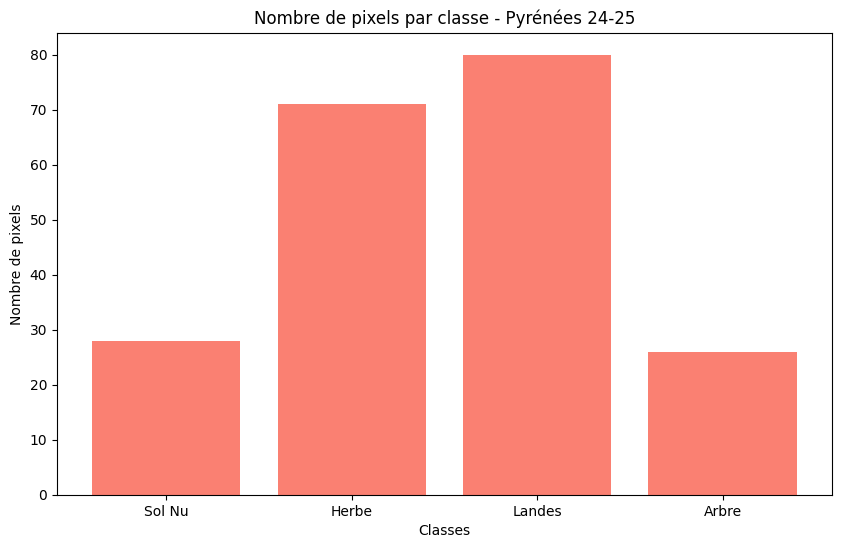

In [18]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Chargement du fichier
shp_path = '/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp'
gdf = gpd.read_file(shp_path)

# 2. Calcul du nombre de pixels (Méthode de la surface totale)
# On additionne les surfaces en m2 par classe, puis on divise par 100 (1 pixel = 100m2)
area_by_class = gdf.groupby('strate')['geometry'].apply(lambda x: x.area.sum())
pixel_counts = (area_by_class / 100).astype(int)

# 3. Préparation des labels
class_names = {1: "Sol Nu", 2: "Herbe", 3: "Landes", 4: "Arbre"}
labels = [class_names.get(i, f"Classe {i}") for i in pixel_counts.index]

# 4. Génération du graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, pixel_counts.values, color='salmon')

ax.set_title("Nombre de pixels par classe - Pyrénées 24-25")
ax.set_ylabel("Nombre de pixels")
ax.set_xlabel("Classes")

# 5. Sauvegarde
os.makedirs('results/figure', exist_ok=True)
out_file = 'results/figure/diag_baton_nb_pix_by_class.png'
plt.savefig(out_file, bbox_inches='tight')

print(f"Graphique sauvegardé dans : {out_file}")
plt.show()

In [25]:
import numpy as np
from osgeo import gdal, ogr

# 1. On définit les chemins
image_ref_path = '/home/onyxia/work/data/projet_eval/pyrenees_24-25_B02.tif'
shp_path = '/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp'
output_raster = '/home/onyxia/work/data/projet_eval/sample_strata.tif'

# 2. On ouvre l'image de référence pour copier ses dimensions et sa projection
raster_ds = gdal.Open(image_ref_path)
geotransform = raster_ds.GetGeoTransform()
projection = raster_ds.GetProjection()
x_size = raster_ds.RasterXSize
y_size = raster_ds.RasterYSize

# 3. On crée le nouveau fichier Raster (vide pour l'instant)
driver = gdal.GetDriverByName('GTiff')
target_ds = driver.Create(output_raster, x_size, y_size, 1, gdal.GDT_Byte)
target_ds.SetGeoTransform(geotransform)
target_ds.SetProjection(projection)

# 4. On ouvre le Shapefile
shp_ds = ogr.Open(shp_path)
layer = shp_ds.GetLayer()

# 5. On "brûle" (rasterize) les polygones dans le raster
# On utilise la colonne 'strate' pour donner la valeur aux pixels
gdal.RasterizeLayer(target_ds, [1], layer, options=["ATTRIBUTE=strate"])

# 6. On ferme proprement les fichiers pour sauvegarder sur le disque
target_ds.FlushCache()
target_ds = None
raster_ds = None
print(f"✅ Succès ! Le fichier raster est créé ici : {output_raster}")

✅ Succès ! Le fichier raster est créé ici : /home/onyxia/work/data/projet_eval/sample_strata.tif


In [26]:
# Maintenant ça va marcher comme dans ton TD !
sample_filename = '/home/onyxia/work/data/projet_eval/sample_strata.tif'
image_filename = '/home/onyxia/work/data/projet_eval/pyrenees_24-25_B02.tif'

# Extraction des échantillons
X, Y, t = cla.get_samples_from_roi(image_filename, sample_filename)

print(f"Nombre de pixels extraits : {X.shape[0]}")

Nombre de pixels extraits : 209


--- Résultats réels ---
Sol Nu : 28 pixels
Herbe : 75 pixels
Landes : 80 pixels
Arbre : 26 pixels


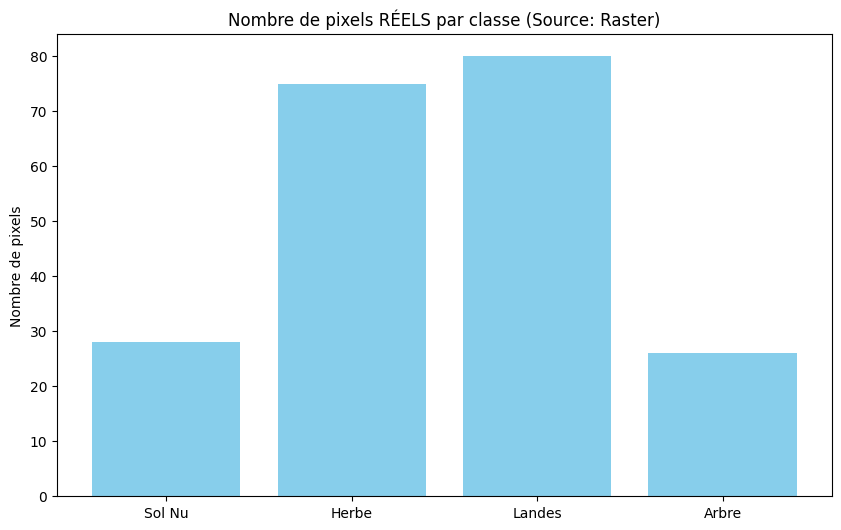

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. On charge le raster des échantillons en tant que matrice (array)
# On utilise la fonction de ton TD
sample_array = rw.load_img_as_array('/home/onyxia/work/data/projet_eval/sample_strata.tif')

# 2. On compte l'occurrence de chaque valeur (1, 2, 3, 4)
# On ignore la valeur 0 qui correspond au vide
values, counts = np.unique(sample_array, return_counts=True)

# On filtre pour ne garder que nos classes 1 à 4
mask = (values > 0)
final_values = values[mask]
final_counts = counts[mask]

# 3. Préparation des labels
class_names = {1: "Sol Nu", 2: "Herbe", 3: "Landes", 4: "Arbre"}
labels = [class_names.get(v, f"Classe {v}") for v in final_values]

# 4. Affichage du graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, final_counts, color='skyblue') # On change de couleur pour marquer le coup !

ax.set_title("Nombre de pixels RÉELS par classe (Source: Raster)")
ax.set_ylabel("Nombre de pixels")

# 5. Sauvegarde
os.makedirs('results/figure', exist_ok=True)
plt.savefig('results/figure/diag_baton_nb_pix_raster.png')

print("--- Résultats réels ---")
for l, c in zip(labels, final_counts):
    print(f"{l} : {c} pixels")

plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_rand_score

# 1 --- Découpage Train/Test (70% apprentissage, 30% test)
# Comme dans le TD, on sépare les données pour valider le modèle
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 2 --- Entraînement du Random Forest
# On utilise 100 arbres comme c'est l'usage standard dans vos exercices
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train.ravel()) # .ravel() transforme Y en vecteur plat

# 3 --- Prédiction sur les données de test
Y_pred = clf.predict(X_test)

# 4 --- Calcul de l'ARI (Adjusted Rand Index)
# On définit la fonction comme demandé dans ton projet
def calcul_ari(Y_true, Y_pred):
    return adjusted_rand_score(Y_true.ravel(), Y_pred.ravel())

score = calcul_ari(Y_test, Y_pred)

print("-" * 30)
print(f"✅ Modèle entraîné sur {X_train.shape[0]} pixels")
print(f"📊 Score ARI final : {score:.3f}")
print("-" * 30)

------------------------------
✅ Modèle entraîné sur 146 pixels
📊 Score ARI final : 0.616
------------------------------


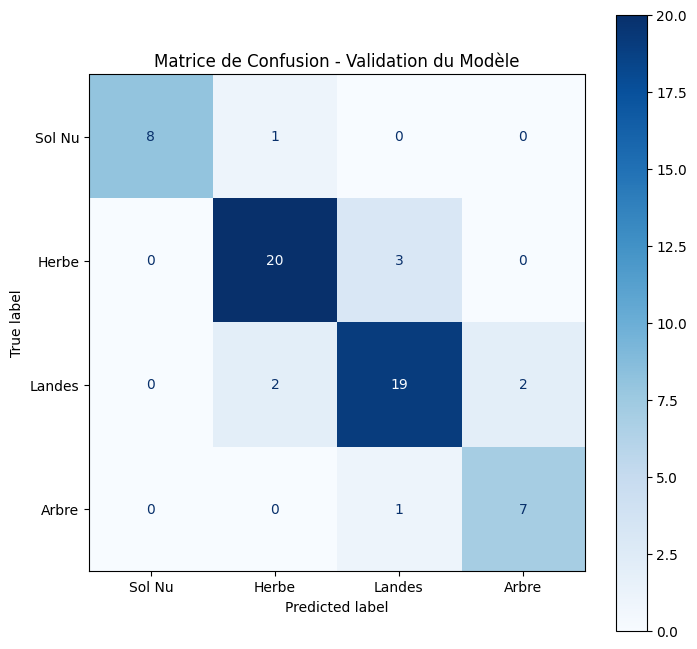

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1 --- Calcul de la matrice
# On compare les étiquettes réelles (Y_test) aux prédictions (Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# 2 --- Affichage graphique
# On utilise les noms des classes pour que ce soit lisible
class_names_list = ["Sol Nu", "Herbe", "Landes", "Arbre"]

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_list)
disp.plot(cmap='Blues', ax=ax, values_format='d')

ax.set_title("Matrice de Confusion - Validation du Modèle")

# 3 --- Sauvegarde
os.makedirs('results/figure', exist_ok=True)
plt.savefig('results/figure/matrice_confusion.png')
plt.show()
